# Sleep Health Data Analysis

Sleep is an important part of human health and well-being, influencing physical, mental, and emotional performance. Understanding the factors that affect sleep patterns and quality can provide valuable insights into improving overall health and productivity. The `Sleep Health and Lifestyle` dataset offers valuable insights into multiple factors influencing sleep patterns and overall lifestyle. Containing 400 rows and 13 columns, this Kaggle dataset covers a wide range of variables such as sleep duration, sleep quality, physical activity levels, stress levels, BMI categories, amount of daily steps, and the presence of sleep disorders. 

Using descriptive statistics and data visualization methods, the aim of this report is to investigate how lifestyle factors correlate with sleep quality. This analysis will provide a solid foundation on future research on sleep and health studies.
  

## Initialization and Preparing Data

In [16]:
# loading all the libraries
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats as st
import plotly.express as px
import seaborn as sns
import numpy as np

In [3]:
sh = pd.read_csv('sleep_health_lifestyle.csv', sep=',')
sh = sh.rename(columns={'Blood Pressure (systolic/diastolic)':'Blood Pressure',
                        'Heart Rate (bpm)':'Heart Rate'}); sh.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,29,Software Engineer,6.1,6.0,42,6,Obese,124/70,91,8539,NaN
1,2,Female,43,Doctor,6.2,6.0,60,8,Obese,131/86,81,18754,NaN
2,3,Male,44,Doctor,6.2,6.0,60,8,Underweight,122/70,81,2857,NaN
3,4,Male,29,Sales Representative,5.9,4.0,30,8,Obese,124/72,55,6886,NaN
4,5,Male,67,Sales Representative,5.9,4.0,30,8,Overweight,133/78,97,14945,Insomnia


According to the documentation:  
  
`'Person ID'` — Unique identifier for each individual  
`'Age'` — Age of the person in years  
`'Gender'` — Male or Female  
`'Occupation'` — The occupation or profession of the person  
`'Sleep Duration'` — The number of hours the person sleeps per day  
`'Quality of SLeep'` — Rating of the quality of sleep (1 to 10)  
`'Physical Activity Level'` — The number of minutes the person engages in physical activity daily  
`'Stress Level'` — Rating of the person's stress level (1 to 10)  
`'BMI Category'` — The BMI category of the person (e.g., Underweight, Normal, Overweight)  
`'Blood Pressure'` — The blood pressure measurement of the person (systolic or diastolic pressure)  
`'Heart Rate'` — The resting heart rate of the person in beats per minute  
`'Daily Steps'` — The number of steps the person takes per day  
`'Sleep Disorder'` — The presence/absence of a sleep disorder (None, Insomnia, Sleep Apnea)   

In [4]:
sh.duplicated().sum() # checking for duplicates

0

In [5]:
sh.isna().sum() # checking for missing values

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             290
dtype: int64

As shown above, although there are no duplicated rows, there are missing values in the `Sleep Disorder` field. These missing values indicate that the individuals studied do not have any sleep disorder. For better usability and clarity, I will replace the `NaN` values with the word "None".

In [6]:
# fill in missing values in the 'Sleep Disorder' category
sh['Sleep Disorder'].fillna('None', inplace=True); sh.head()

/var/folders/bc/86pjh63n4_d1c_tpvlp1mjg00000gn/T/ipykernel_98857/4013395694.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sh['Sleep Disorder'].fillna('None', inplace=True); sh.head()


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,29,Software Engineer,6.1,6.0,42,6,Obese,124/70,91,8539,None
1,2,Female,43,Doctor,6.2,6.0,60,8,Obese,131/86,81,18754,None
2,3,Male,44,Doctor,6.2,6.0,60,8,Underweight,122/70,81,2857,None
3,4,Male,29,Sales Representative,5.9,4.0,30,8,Obese,124/72,55,6886,None
4,5,Male,67,Sales Representative,5.9,4.0,30,8,Overweight,133/78,97,14945,Insomnia


In [7]:
sh.info() # general summary / information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                400 non-null    int64  
 1   Gender                   400 non-null    object 
 2   Age                      400 non-null    int64  
 3   Occupation               400 non-null    object 
 4   Sleep Duration           400 non-null    float64
 5   Quality of Sleep         400 non-null    float64
 6   Physical Activity Level  400 non-null    int64  
 7   Stress Level             400 non-null    int64  
 8   BMI Category             400 non-null    object 
 9   Blood Pressure           400 non-null    object 
 10  Heart Rate               400 non-null    int64  
 11  Daily Steps              400 non-null    int64  
 12  Sleep Disorder           400 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 40.8+ KB


After checking for duplicates, filling in missing values, renaming columns, and ensuring the general summary includes appropriate data types for each variable, the data is ready to use for exploratory data analysis.
  

## Studying Sleeping and Lifestyle

With the dataset cleaned and prepared, I can begin to explore the relationships between sleep and lifestyle habits through data visualizations. These charts will provide valuable insights into the best way for improving sleep health.

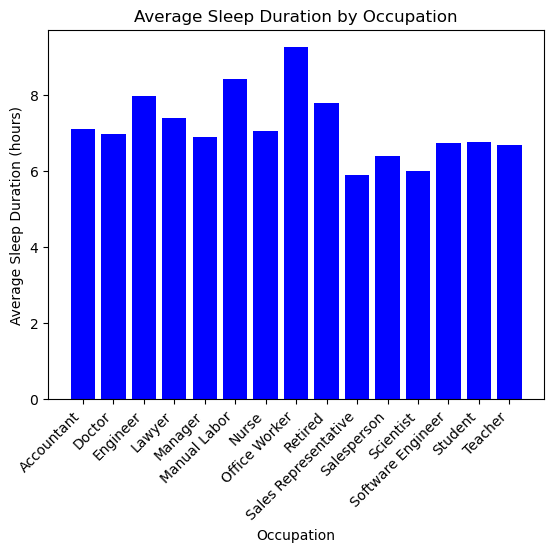

In [27]:
sleep_occ = sh.groupby('Occupation')['Sleep Duration'].mean().reset_index()
plt.bar(sleep_occ['Occupation'], sleep_occ['Sleep Duration'], color='blue')
plt.xlabel('Occupation')
plt.ylabel('Average Sleep Duration (hours)')
plt.title('Average Sleep Duration by Occupation')
plt.xticks(rotation=45, ha='right');

This bar shows the average sleep durating across different occupations. Office workers have the highest average sleep duration (9.26 hours) among the studied occupations; this can be due to the sendentary lifestyle and predictable work schedules, allowing more consistent sleep schedules. On the other hand, the sales representative has the lowest average sleep duration (5.9 hours). This is likley due to high-stress nature of the role, having to fill out a certain quota in a tight timeframe, causing inconsistent sleep schedules.

Text(0.5, 1.0, 'Quality of Sleep vs Stress Level by Sleep Disorders')

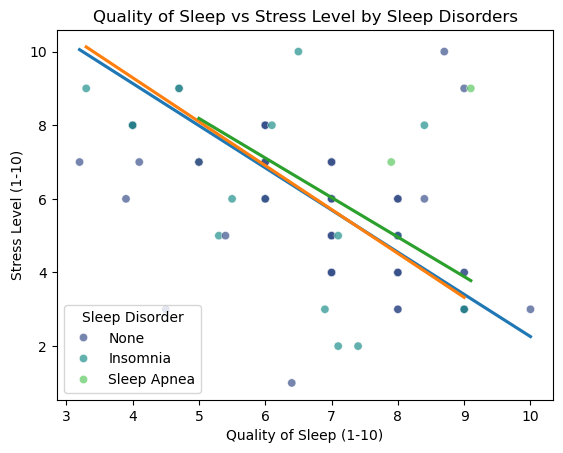

In [28]:
disorder = sh[['Quality of Sleep', 'Stress Level', 'Sleep Disorder']]
sns.scatterplot(data=disorder, x='Quality of Sleep',y='Stress Level',
                hue='Sleep Disorder', palette='viridis', alpha=0.7)
for disorder_type in disorder['Sleep Disorder'].unique():
    subset = disorder[disorder['Sleep Disorder'] == disorder_type]
    sns.regplot(x='Quality of Sleep', y='Stress Level', data=subset, ci=None,
                scatter=False, label=f'Trendline ({disorder_type})')
plt.xlabel('Quality of Sleep (1-10)')
plt.ylabel('Stress Level (1-10)')
plt.title('Quality of Sleep vs Stress Level by Sleep Disorders')

This scatterplot illustrates the correlation between quality of sleep and stress levels, categorized by sleep disorders. There is a clear negative downwards trend between all sleep conditions, showing that individuals with higher sleep quality tend to have lower stress levels, while those with lower sleep quality experience higher stress levels. The cases of the few outliers, where individuals with high stress levels have a high quality of sleep, may be explained by external factors not captured in the dataset.

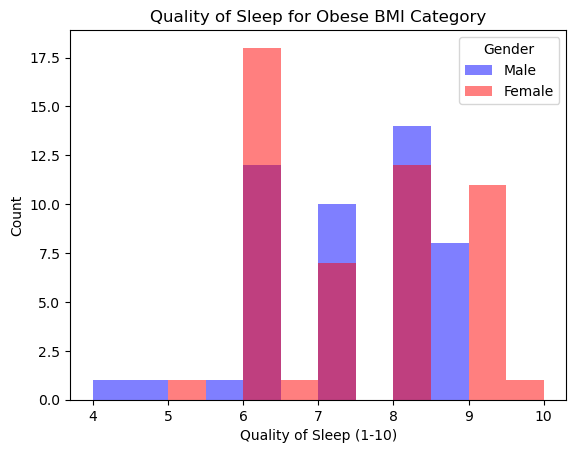

In [29]:
filtered = sh[sh['BMI Category'] == 'Obese']
male = filtered[filtered['Gender'] == 'Male']['Quality of Sleep']
female = filtered[filtered['Gender'] == 'Female']['Quality of Sleep']
male.plot(kind='hist', bins=10, alpha=0.5, label='Male',color='blue')
female.plot(kind='hist', bins=10, alpha=0.5, label='Female',color='red')
plt.xlabel('Quality of Sleep (1-10)')
plt.ylabel('Count')
plt.title('Quality of Sleep for Obese BMI Category')
plt.legend(title='Gender')

This histogram displays the distribution of sleep quality among individuals in the obese BMI category, grouped by gender. The distribution of sleep quality for both genders is almost a normal distribution with a slight negative skew, with most individuals reporting sleep quality ratings between 6 and 9. Female participants show a higher count of sleep quality ratings at 6 compared to male individuals, with a difference of 5 counts. This suggests that females in the obese BMI category may experience slightly worse sleep quality than their male counterparts.
  

## Conclusion

This analysis of the `Sleep Health and Lifestyle` dataset provided valuable insights into the factors influencing sleep duration and quality. By exploring relationships between lifestyle variables (e.g., physical activity, occupation) and health metrics (e.g., BMI, stress level), I identified several key trends and patterns. For example, higher stress levels are strongly associated with poorer sleep quality and stress level and having a sedentary work-life balance results in a higher sleep duration. By using these insights, we can develop strategies to promote better sleep and healthier lives.